<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/06_LogisticRegression_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0 . Import library

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [26]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

fatal: destination path 'DS102.K21' already exists and is not an empty directory.


In [0]:
data_train = pd.read_csv("DS102.K21/Social_Network_Ads_Train.csv")

In [0]:
data_test = pd.read_csv("DS102.K21/Social_Network_Ads_Test.csv")

In [29]:
X_train = data_train.iloc[:,[3,4]].values
X_train.shape

(300, 2)

In [30]:
y_train = data_train.iloc[:,-1].values
y_train.shape

(300,)

In [31]:
X_test = data_test.iloc[:,[3,4]].values
X_test.shape

(100, 2)

In [32]:
y_test = data_test.iloc[:,-1].values
y_test.shape

(100,)

# 2 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X_train = SC.fit_transform(X_train)

In [0]:
X_test = SC.fit_transform(X_test)

# 3 . Build model

In [0]:
model = LogisticRegression(random_state = 0)

In [37]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 4 . Visualize

In [0]:
def VisualizingDataset(X_, y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(y_)):
        plt.scatter(X1[y_ == label], X2[y_ == label], color = ListedColormap(('red', 'green'))(i))
        plt.legend(np.unique(y_))

In [0]:
def VisualizingResult(model, X_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    X1_range = np.arange(X1.min()-1, X1.max()+1, 0.01)
    X2_range = np.arange(X2.min()-1, X2.max()+1, 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid = np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    y_grid = model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, y_grid, alpha = 0.5, cmap = ListedColormap(('red','green')))

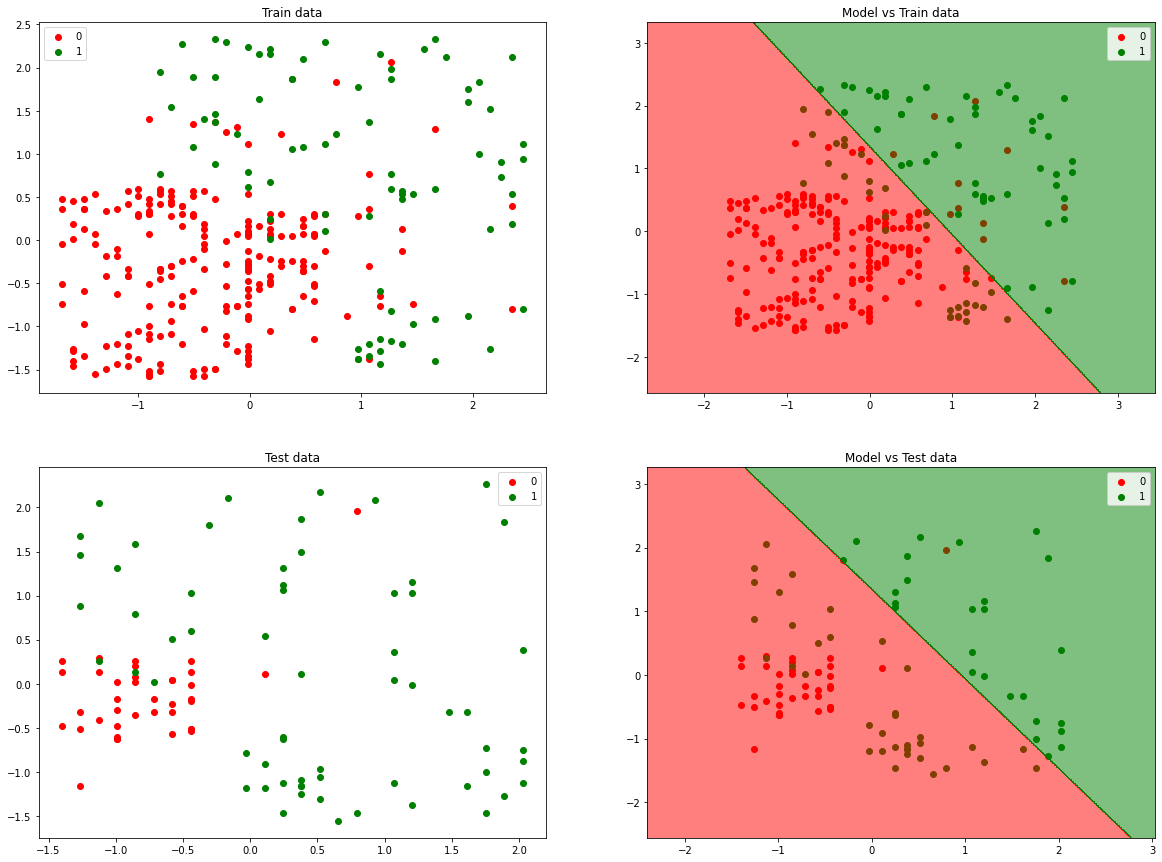

In [40]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
VisualizingDataset(X_train, y_train)
plt.title('Train data')
plt.subplot(2,2,2)
VisualizingDataset(X_train, y_train)
VisualizingResult(model, X_train)
plt.title('Model vs Train data')
plt.subplot(2,2,3)
VisualizingDataset(X_test, y_test)
plt.title('Test data')
plt.subplot(2,2,4)
VisualizingDataset(X_test, y_test)
VisualizingResult(model, X_test)
plt.title('Model vs Test data')
plt.show()

# 5 . Confusion matrix

In [41]:
print('Confusion matrix in train data: \n', confusion_matrix(y_train, model.predict(X_train)))

Confusion matrix in train data: 
 [[208  11]
 [ 31  50]]


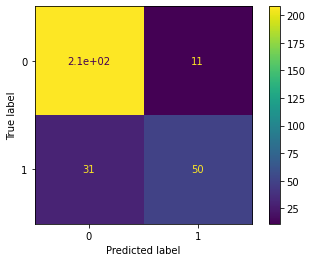

In [42]:
plot_confusion_matrix(model, X_train, y_train)

In [43]:
print('Confusion matrix in test data: \n', confusion_matrix(y_test, model.predict(X_test)))

Confusion matrix in test data: 
 [[37  1]
 [36 26]]


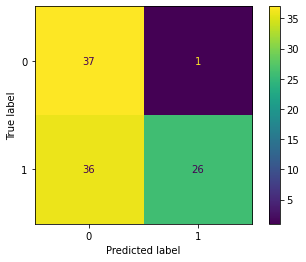

In [44]:
plot_confusion_matrix(model, X_test, y_test)

# 6 . Compare

In [0]:
def compare(i_example):
    X = X_test[i_example:i_example + 1]
    y = y_test[i_example]
    y_pred = model.predict(X)
    X_inv = SC.inverse_transform(X)
    print(X_inv, y, y_pred)

In [46]:
for i in range(7,12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [1]
[[3.60e+01 1.25e+05]] 1 [0]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [0]
[[3.9e+01 9.6e+04]] 1 [0]
